## **Training a model with SVM**

<a href="https://colab.research.google.com/github/armandoordonez/machinelearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Libraries Import**

In [1]:
# Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import svm model
from sklearn import svm

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Import numpy and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

### **Loading Data**

In [2]:
#Load dataset

cancer = datasets.load_breast_cancer()
data = cancer.data

### **Review Data**

In [3]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("\nLabels: ", cancer.target_names)

# print data(feature)shape
print("\nData shape: ", cancer.data.shape)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Labels:  ['malignant' 'benign']

Data shape:  (569, 30)


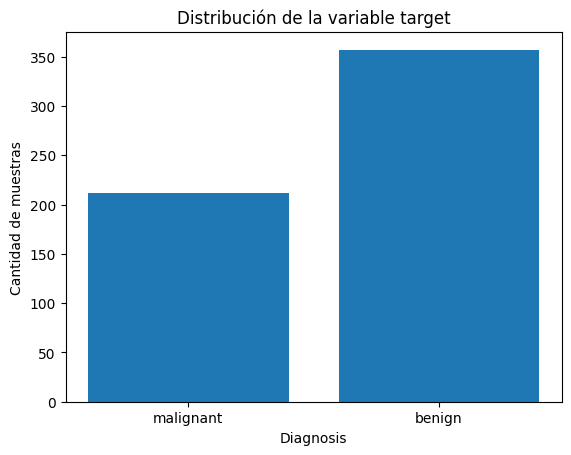

In [4]:
# The distribution of the target

target = cancer.target
target_names = cancer.target_names

# Calculate the number of samples per class
counts = [sum(target == i) for i in range(len(target_names))]

# Create bar chart
plt.bar(target_names, counts)
plt.xlabel('Diagnosis')
plt.ylabel('Cantidad de muestras')
plt.title('Distribución de la variable target')

# Show bar chart
plt.show()

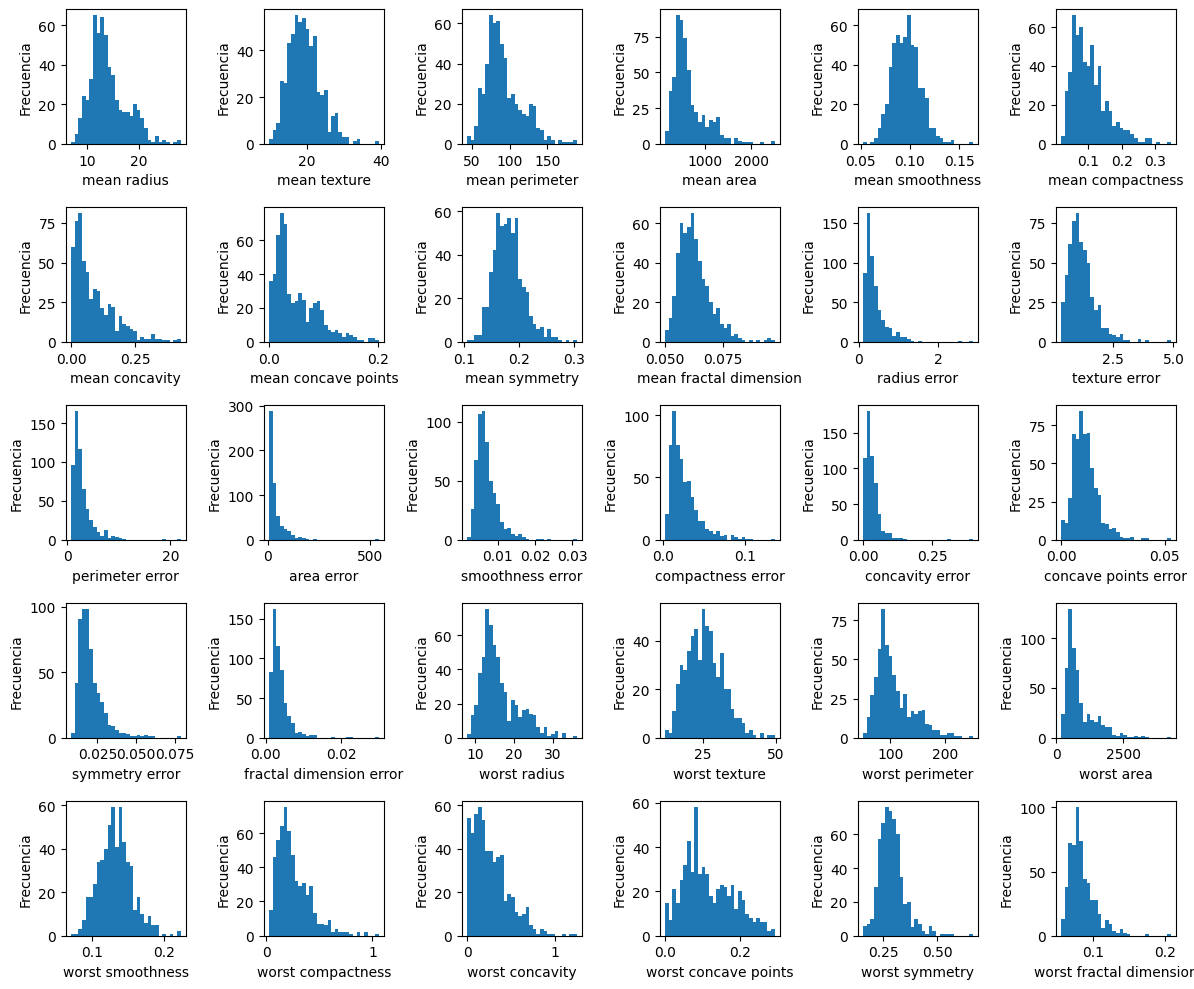

In [5]:
# Calculate subplot grid size
n_rows = 5  # Number of rows in the grid
n_cols = 6  # Number of columns in the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

# Create a histogram for each subplot
for i in range(data.shape[1]):
    row = i // n_cols  # Get the corresponding row number
    col = i % n_cols  # Get the corresponding column number
    axes[row, col].hist(data[:, i], bins=30)
    axes[row, col].set_xlabel(cancer.feature_names[i])
    axes[row, col].set_ylabel('Frecuencia')

# Adjust the spaces between subplots
plt.tight_layout()

# Show graph with all histograms
plt.show()

### **Train and Test Data Split**

In [6]:
# Split dataset into data and labels, in X and y respectively
#
X = cancer.data
y = cancer.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test


### **Training the Model**

In [13]:
#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### **Evaluating the Model**

In [14]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9181286549707602
Precision: 0.8852459016393442
Recall: 1.0


### **Visualizing the decision boundary of the model**

Decision boundaries are obtained using the model coefficients and the intercept.
A range of values along the first feature (xx) is created and the corresponding values
of the second feature (yy) are calculated using the separation hyperplane equation.

A graph representing the input data will be displayed along with the decision boundaries of the SVM model. This will allow you to visualize the function of the SVM and how it separates the classes in the feature space.

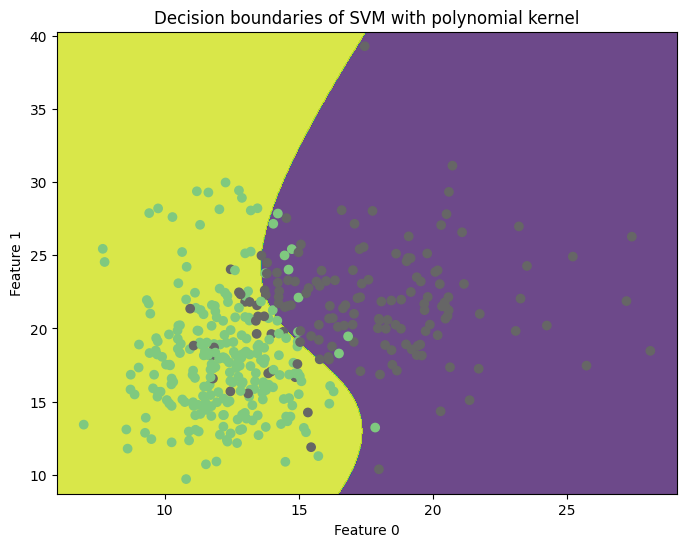

In [16]:
# Split dataset into data and labels, in X and y respectively
X = cancer.data
y = cancer.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Select the features to visualize
feature_idx1 = 0
feature_idx2 = 1
X_train_visualize = X_train[:, [feature_idx1, feature_idx2]]
X_test_visualize = X_test[:, [feature_idx1, feature_idx2]]

# Create a svm Classifier with a polynomial kernel
clf = svm.SVC(kernel='poly', degree=3)  # Polynomial Kernel of degree 3

# Train the model using the training sets
clf.fit(X_train_visualize, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test_visualize)

# Create a meshgrid of feature values
h = 0.02  # step size in the mesh
x_min, x_max = X_train_visualize[:, 0].min() - 1, X_train_visualize[:, 0].max() + 1
y_min, y_max = X_train_visualize[:, 1].min() - 1, X_train_visualize[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain predictions for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and training data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
plt.scatter(X_train_visualize[:, 0], X_train_visualize[:, 1], c=y_train, cmap='Accent_r')
plt.xlabel(f'Feature {feature_idx1}')
plt.ylabel(f'Feature {feature_idx2}')
plt.title('Decision boundaries of SVM with polynomial kernel')
plt.show()

## Ejercicio

Utilice kernels con polinomios de diferente grado y el kernel RBF para construir la frontera de decisión. Compare sus resultados. 